In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


# Data đã xử lý

In [3]:
df_april = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_april.csv')
df_october = pd.read_csv('/kaggle/input/clean-aws-month/final_data/filled_data_october.csv')

In [4]:
df_april.head()

,datetime,row,col,AWS,CAPE,EWSS,IE,ISOR,KX,PEV,...,B09B,B10B,B11B,B12B,B14B,B16B,I2B,I4B,IRB,WVB
0,2019-04-01 00:00:00,0,114,0.0,446.125,-641.113281,-0.000014,0.588248,37.360176,-0.000016,...,253.877518,261.638123,281.487091,260.333344,285.000702,269.992981,281.766937,286.364563,285.240051,244.275345
1,2019-04-01 02:00:00,0,114,9.2,519.750,-201.390625,-0.000037,0.588248,36.553154,-0.000070,...,250.888718,253.995895,261.295807,247.252029,262.435974,255.327316,261.579437,283.843597,262.818237,243.474976
2,2019-04-01 03:00:00,0,114,7.4,447.500,-80.894531,-0.000043,0.588248,34.931915,-0.000094,...,251.353149,255.523193,268.688995,252.243011,269.938660,259.248505,268.137817,288.332275,269.414612,243.472137
3,2019-04-01 04:00:00,0,114,0.0,421.500,-33.917969,-0.000043,0.588248,32.517395,-0.000102,...,253.576904,259.337555,277.587189,257.868683,279.395111,265.641571,276.697174,303.794434,280.188019,244.486572
4,2019-04-01 05:00:00,0,114,0.0,435.625,11.640625,-0.000039,0.588248,31.718704,-0.000118,...,252.470215,256.889984,267.289856,251.395325,268.833862,260.088013,267.634430,295.567719,269.526978,244.371689


# Feature đã chọn dựa trên phương án 1
- T4:  CAPE, KX, R500, R850, TCLW, TCW, U250, U850, V250, V850, B10B, B11B, B14B, I2B, I4B, IRB, WVB
- T10:  EWSS, KX, PEV, R250, R500, R850, SSHF, TCLW, TCW, U250, U850, V250, V850, B11B,  B14B, I4B, IRB

In [5]:
features_april = ['CAPE', 'KX', 'R500', 'R850', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B10B', 'B11B', 'B14B', 'I2B', 'I4B', 'IRB', 'WVB']
features_october = ['EWSS', 'KX', 'PEV', 'R250', 'R500', 'R850', 'SSHF', 'TCLW', 'TCW', 'U250', 'U850', 'V250', 'V850', 'B11B', 'B14B', 'I4B', 'IRB']

# Chia train test theo thời gian

In [6]:
def check_missing_hours(df, month):
    df['datetime'] = pd.to_datetime(df['datetime']) 
    df = df[df['datetime'].dt.month == month].copy()

    all_dates = df['datetime'].dt.date.unique()
    all_expected_hours = []
    for date in all_dates:
        hours = pd.date_range(f"{date} 00:00:00", f"{date} 23:00:00", freq="H")
        all_expected_hours.extend(hours)
    
    expected_df = pd.DataFrame(all_expected_hours, columns=["datetime"])
    missing_times = expected_df[~expected_df['datetime'].isin(df['datetime'])]
    return missing_times

missing_april = check_missing_hours(df_april, 4)
missing_october = check_missing_hours(df_october, 10)

print("T4:")
print(missing_april['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').to_string(index=False))

print("T10:")
print(missing_october['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S').to_string(index=False))


T4:
2020-04-06 04:00:00
2020-04-13 05:00:00
T10:
2019-10-07 11:00:00
2019-10-07 12:00:00
2019-10-07 13:00:00
2019-10-07 14:00:00
2019-10-07 16:00:00
2019-10-08 20:00:00
2019-10-08 21:00:00
2019-10-08 22:00:00
2019-10-08 23:00:00
2019-10-09 00:00:00
2019-10-09 01:00:00
2019-10-09 02:00:00
2019-10-09 18:00:00
2019-10-09 19:00:00
2019-10-09 20:00:00
2019-10-09 21:00:00
2019-10-09 22:00:00
2019-10-09 23:00:00
2019-10-10 00:00:00
2019-10-10 03:00:00
2019-10-10 04:00:00
2019-10-10 05:00:00
2019-10-10 06:00:00
2019-10-10 07:00:00
2019-10-15 13:00:00
2019-10-15 16:00:00
2019-10-15 18:00:00
2019-10-15 19:00:00
2019-10-15 20:00:00
2019-10-15 21:00:00
2019-10-16 02:00:00
2019-10-16 03:00:00
2019-10-16 04:00:00
2019-10-16 05:00:00
2019-10-16 18:00:00
2019-10-16 20:00:00
2019-10-16 21:00:00
2019-10-16 22:00:00
2019-10-16 23:00:00
2019-10-17 00:00:00
2019-10-17 01:00:00
2019-10-17 18:00:00
2019-10-17 19:00:00
2019-10-17 20:00:00
2019-10-17 21:00:00
2019-10-17 22:00:00
2019-10-17 23:00:00
2019-10-18 

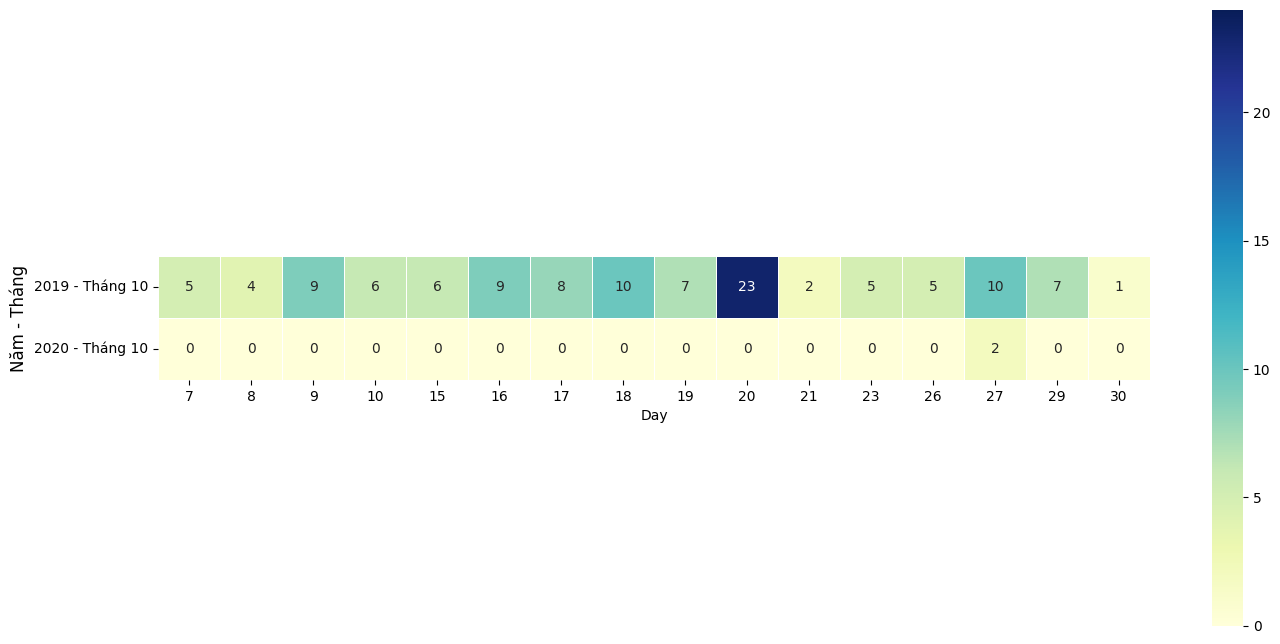

In [7]:
def create_missing_hours_heatmap(missing_times, month_name):
    missing_times['Year'] = missing_times['datetime'].dt.year
    missing_times['Month'] = missing_times['datetime'].dt.month
    missing_times['Day'] = missing_times['datetime'].dt.day
    missing_times['Hour'] = missing_times['datetime'].dt.hour
    
    missing_counts = missing_times.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Missing_Hours')

    pivot_data = missing_counts.pivot_table(
        index=['Year', 'Month'], columns='Day', values='Missing_Hours', fill_value=0
    )
    
    pivot_data.index = [f'{year} - Tháng {month}' for year, month in pivot_data.index]

    plt.figure(figsize=(16, 8))
    sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5, square=True, vmin=0, vmax=24)
    plt.ylabel('Năm - Tháng', fontsize=12)
    plt.show()

create_missing_hours_heatmap(missing_october, "Tháng 10")

- Tháng 4 thiếu giờ ở ngày 2020-04-06 và 2020-04-13
- Tháng 10 thiếu giờ chủ yếu ở năm 2019 trong ngày 7,8,9,19,15-21,23,26,27,29,30

  => quyết định chia tập train từ 4/4/2019 đến 28/4/2019 và 4/4/2020 đến 28/4/2020, tập test là những ngày còn lại
 -  tương tự cho tháng 10

In [8]:
def split_data_by_multiple_ranges(df, train_ranges):
    train_mask = False
    for start, end in train_ranges:
        train_mask |= (df['datetime'] >= start) & (df['datetime'] < end)
    train_df = df[train_mask]
    test_df = df[~train_mask]
    return train_df, test_df

def convert_rain_label(df):
    df['AWS'] = df['AWS'].apply(lambda x: 1 if x > 0 else 0)
    return df

df_april = convert_rain_label(df_april)
df_october = convert_rain_label(df_october)

train_ranges_april = [("2019-04-04", "2019-04-29"), ("2020-04-04", "2020-04-29")]
train_ranges_october = [("2019-10-04", "2019-10-29"), ("2020-10-04", "2020-10-29")]

train_april, test_april = split_data_by_multiple_ranges(df_april, train_ranges_april)
train_october, test_october = split_data_by_multiple_ranges(df_october, train_ranges_october)

print(f"Tháng 4 - Train: {train_april.shape}")
print(f"Tháng 4 - Test: {test_april.shape}")
print(f"Tháng 10 - Train: {train_october.shape}")
print(f"Tháng 10 - Test: {test_october.shape}")


Tháng 4 - Train: (253767, 33)
Tháng 4 - Test: (52079, 33)
Tháng 10 - Train: (281128, 33)
Tháng 10 - Test: (70692, 33)


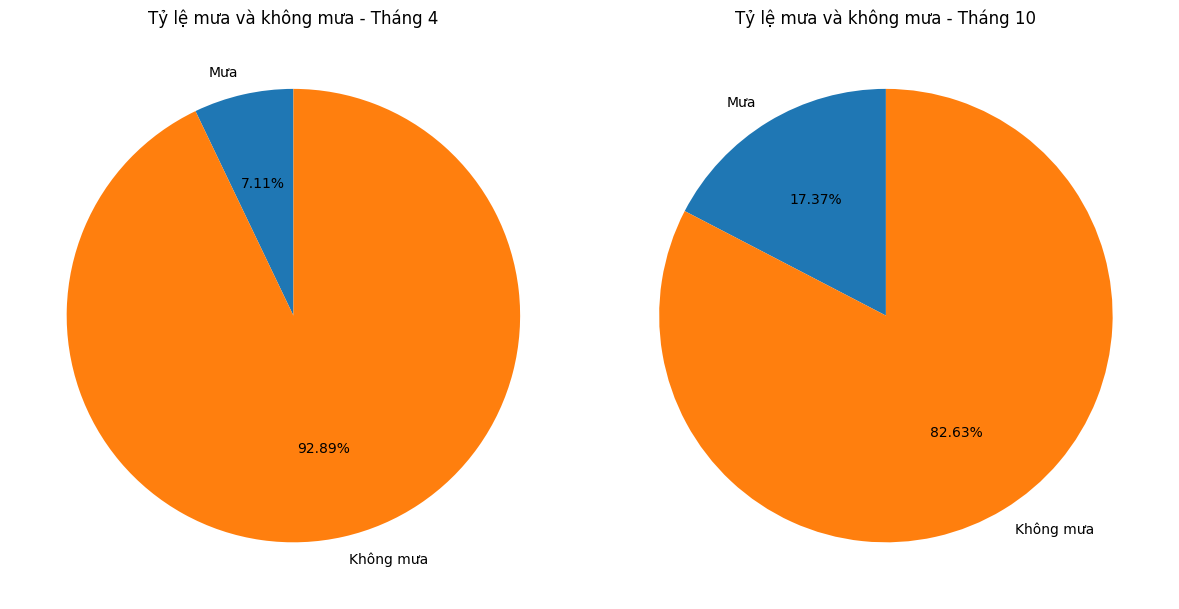

In [9]:
rain_april = train_april[train_april['AWS'] == 1].shape[0]
no_rain_april = train_april[train_april['AWS'] == 0].shape[0]
total_april = train_april.shape[0]
rain_ratio_april = rain_april / total_april
no_rain_ratio_april = no_rain_april / total_april

rain_october = train_october[train_october['AWS'] == 1].shape[0]
no_rain_october = train_october[train_october['AWS'] == 0].shape[0]
total_october = train_october.shape[0]
rain_ratio_october = rain_october / total_october
no_rain_ratio_october = no_rain_october / total_october

labels = ['Mưa', 'Không mưa']
rain_data_april = [rain_ratio_april, no_rain_ratio_april]
rain_data_october = [rain_ratio_october, no_rain_ratio_october]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(rain_data_april, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[0].set_title(f"Tỷ lệ mưa và không mưa - Tháng 4")

axes[1].pie(rain_data_october, labels=labels, autopct='%1.2f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[1].set_title(f"Tỷ lệ mưa và không mưa - Tháng 10")

plt.tight_layout()
plt.show()

# Min-max normalization

In [10]:
train_april.shape[1]

33

In [11]:
X_train_april = train_april[features_april]
y_train_april = train_april['AWS']

X_test_april = test_april[features_april]
y_test_april = test_april['AWS']

X_train_october = train_october[features_october]
y_train_october = train_october['AWS']

X_test_october = test_october[features_october]
y_test_october = test_october['AWS']

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler_april = MinMaxScaler()
X_train_april_scaled = scaler_april.fit_transform(X_train_april)
X_test_april_scaled = scaler_april.transform(X_test_april)

scaler_october = MinMaxScaler()
X_train_october_scaled = scaler_october.fit_transform(X_train_october)
X_test_october_scaled = scaler_october.transform(X_test_october)

In [13]:
X_train_april_scaled = pd.DataFrame(X_train_april_scaled, columns=X_train_april.columns)
X_test_april_scaled = pd.DataFrame(X_test_april_scaled, columns=X_test_april.columns)

X_train_october_scaled = pd.DataFrame(X_train_october_scaled, columns=X_train_october.columns)
X_test_october_scaled = pd.DataFrame(X_test_october_scaled, columns=X_test_october.columns)

# Train lúc chưa cân bằng

In [14]:
models_info = [
    ("Tháng 4", X_train_april_scaled, y_train_april, X_test_april_scaled, y_test_april),
    ("Tháng 10", X_train_october_scaled, y_train_october, X_test_october_scaled, y_test_october)
]

## PNN

In [15]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [16]:
from sklearn.metrics import pairwise_distances

class RBFLayer:
    def __init__(self, centers, sigma=1.0):
        self.centers = centers
        self.sigma = sigma

    def compute(self, X):
        diff = X[:, np.newaxis, :] - self.centers
        dist_sq = np.sum(diff**2, axis=2)
        return np.exp(-dist_sq / (2 * self.sigma**2))

def softmax(z):
    # z: (n_samples, n_classes)
    z_max = np.max(z, axis=1, keepdims=True)
    e_z = np.exp(z - z_max)
    return e_z / e_z.sum(axis=1, keepdims=True)


#Define PNN Model
class PNN:
    def __init__(self, sigma=1.0, batch_size=1000):
        self.sigma = sigma
        self.centers = None
        self.batch_size = batch_size

    def fit(self, X_train, y_train):
        if isinstance(X_train, pd.DataFrame):
            X_train = X_train.values
        else:
            X_train = X_train
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        else:
            y_train = y_train

        classes = np.unique(y_train)
        centers = []
        for c in classes:
            centers.append(X_train[y_train == c].mean(axis=0))
        self.centers = np.vstack(centers)
        self.rbf = RBFLayer(self.centers, sigma=self.sigma)

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = X
            
        n = X.shape[0]
        if self.batch_size is None:
            raw = self.rbf.compute(X)
            return softmax(raw)
        # batch processing
        probs = []
        for start in range(0, n, self.batch_size):
            end = min(start + self.batch_size, n)
            raw = self.rbf.compute(X[start:end])
            probs.append(softmax(raw))
        return np.vstack(probs)

    def predict(self, X):
        # trả về nhãn 0 hoặc 1
        probs = self.predict_proba(X)
        return np.argmax(probs, axis=1)

Fine tuning...
Tháng 4...
Best sigma: 0.2559547922699536 with f1: 0.5916058517360576
Tháng 10...
Best sigma: 0.10985411419875583 with f1: 0.7338666487371215
Train with best param...
Tháng 4...
(253767, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     46790
           1       0.16      0.54      0.25      5289

    accuracy                           0.67     52079
   macro avg       0.55      0.61      0.52     52079
weighted avg       0.85      0.67      0.73     52079

Confusion Matrix:
[[32119 14671]
 [ 2447  2842]]


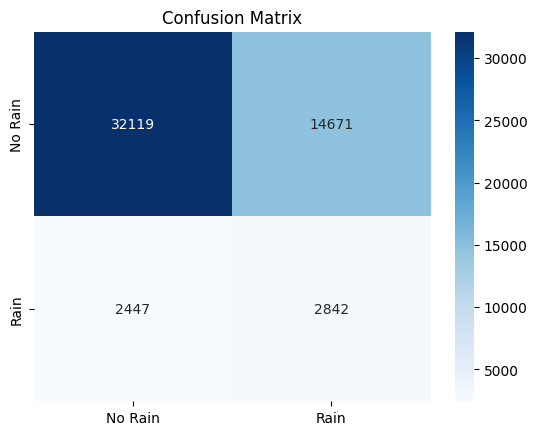

Tháng 10...
(281128, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     57109
           1       0.39      0.81      0.52     13583

    accuracy                           0.72     70692
   macro avg       0.66      0.75      0.66     70692
weighted avg       0.83      0.72      0.75     70692

Confusion Matrix:
[[39785 17324]
 [ 2583 11000]]


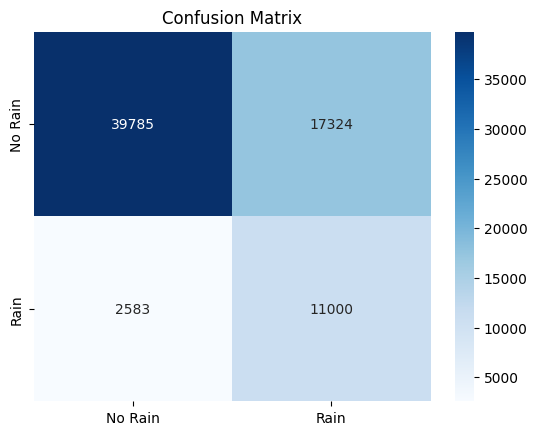

In [17]:
#Fine-tune + train
sigmas = np.logspace(-2, 1, 50)
param_grid = {'sigma': sigmas.tolist()}  # Grid search for sigma values

best_score = 0
best_sigma = 0

# Perform grid search over the values of sigma
print("Fine tuning...")
for name, train_X, train_Y, X_test, y_test in models_info:
    X_train, X_val, y_train, y_val = train_test_split(
        train_X, train_Y, test_size=0.2, random_state=42
    )
    print(f"{name}...")
    for sigma in param_grid['sigma']:
        pnn_batch = PNN(sigma=sigma, batch_size=2048)
        pnn_batch.fit(X_train, y_train)
        y_pred = pnn_batch.predict(X_val)
        score = classification_report(y_val, y_pred, zero_division=0, output_dict=True)['macro avg']['f1-score']
    
        if score > best_score:
            best_score = score
            best_sigma = sigma

    print(f"Best sigma: {best_sigma} with f1: {best_score}")

# Final evaluation with the best sigma
print("Train with best param...")
for name, X_train, y_train, X_test, y_test in models_info:
    print(f"{name}...")
    print(X_train.shape)
    pnn_batch = PNN(sigma=best_sigma, batch_size=1000)
    pnn_batch.fit(X_train, y_train)
    y_pred = pnn_batch.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Optionally, plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
    plt.title("Confusion Matrix")
    plt.show()



# Cân bằng dữ liệu bằng 3 phương pháp SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.model_selection import train_test_split
import numpy as np

def balance_datasets(models_info, method="smote", random_state=42):
    balanced_data = []

    for name, X_train, y_train, X_test, y_test in models_info:
        print(f"\n{name} - Đang cân bằng với phương pháp: {method.upper()}")

        if method == "smote":
            sampler = SMOTE(random_state=random_state)
        elif method == "smoteenn":
            sampler = SMOTEENN(random_state=random_state)
        elif method == "smotecnn":
            # CNN chỉ hỗ trợ under-sampling, nên cần dùng SMOTE trước rồi mới dùng CNN
            X_temp, y_temp = SMOTE(random_state=random_state).fit_resample(X_train, y_train)
            sampler = CondensedNearestNeighbour()
            X_res, y_res = sampler.fit_resample(X_temp, y_temp)

            unique, counts = np.unique(y_res, return_counts=True)
            print(f"Số lượng mẫu sau cân bằng (SMOTECNN): {dict(zip(unique, counts))}")
            balanced_data.append((name, X_res, y_res, X_test, y_test))
            continue
        else:
            raise ValueError("Phương pháp không hợp lệ. Chọn: smote, smoteenn hoặc smotecnn")

        X_res, y_res = sampler.fit_resample(X_train, y_train)
        unique, counts = np.unique(y_res, return_counts=True)
        print(f"Số lượng mẫu sau cân bằng: {dict(zip(unique, counts))}")

        balanced_data.append((name, X_res, y_res, X_test, y_test))

    return balanced_data


## SMOTE

In [19]:
balanced_models_smote = balance_datasets(models_info, method="smote")


Tháng 4 - Đang cân bằng với phương pháp: SMOTE
Số lượng mẫu sau cân bằng: {0: 235728, 1: 235728}

Tháng 10 - Đang cân bằng với phương pháp: SMOTE
Số lượng mẫu sau cân bằng: {0: 232286, 1: 232286}


### PNN after SMOTE

Fine tuning...
Tháng 4...
Best sigma: 0.2559547922699536 with f1: 0.7598985179460291
Tháng 10...
Best sigma: 0.19306977288832497 with f1: 0.8008447232932384
Train with best param...
Tháng 4...
(471456, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.69      0.79     46790
           1       0.16      0.54      0.25      5289

    accuracy                           0.67     52079
   macro avg       0.55      0.61      0.52     52079
weighted avg       0.85      0.67      0.73     52079

Confusion Matrix:
[[32058 14732]
 [ 2434  2855]]


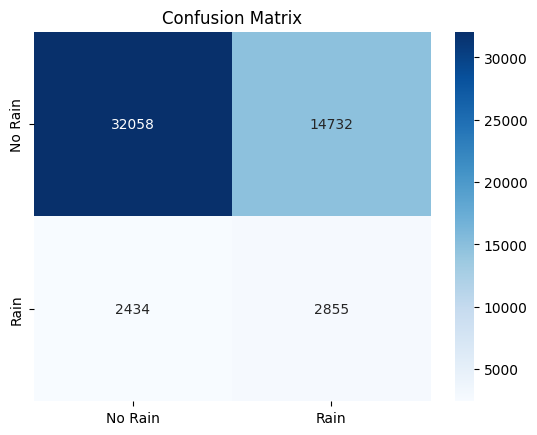

Tháng 10...
(464572, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     57109
           1       0.39      0.82      0.53     13583

    accuracy                           0.72     70692
   macro avg       0.66      0.76      0.66     70692
weighted avg       0.83      0.72      0.75     70692

Confusion Matrix:
[[39656 17453]
 [ 2503 11080]]


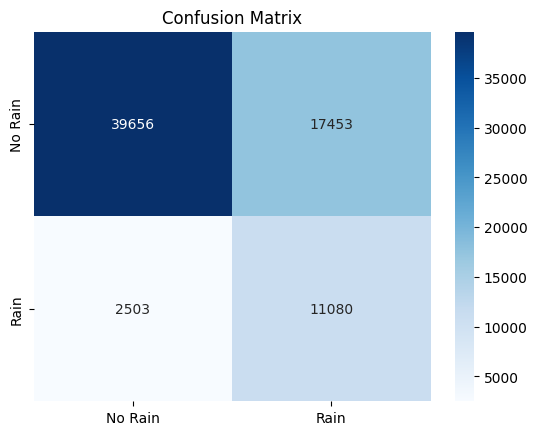

In [20]:
#Fine-tune + train
sigmas = np.logspace(-2, 1, 50)
param_grid = {'sigma': sigmas.tolist()}  # Grid search for sigma values

best_score = 0
best_sigma = 0

# Perform grid search over the values of sigma
print("Fine tuning...")
for name, train_X, train_Y, X_test, y_test in balanced_models_smote:
    X_train, X_val, y_train, y_val = train_test_split(
        train_X, train_Y, test_size=0.2, random_state=42
    )
    print(f"{name}...")
    for sigma in param_grid['sigma']:
        pnn_batch = PNN(sigma=sigma, batch_size=2048)
        pnn_batch.fit(X_train, y_train)
        y_pred = pnn_batch.predict(X_val)
        score = classification_report(y_val, y_pred, zero_division=0, output_dict=True)['macro avg']['f1-score']
    
        if score > best_score:
            best_score = score
            best_sigma = sigma

    print(f"Best sigma: {best_sigma} with f1: {best_score}")

# Final evaluation with the best sigma
print("Train with best param...")
for name, X_train, y_train, X_test, y_test in balanced_models_smote:
    print(f"{name}...")
    print(X_train.shape)
    pnn_batch = PNN(sigma=best_sigma, batch_size=1000)
    pnn_batch.fit(X_train, y_train)
    y_pred = pnn_batch.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Optionally, plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
    plt.title("Confusion Matrix")
    plt.show()



## SMOTE ENN

In [21]:
# # Dùng SMOTE + ENN
balanced_models_smoteenn = balance_datasets(models_info, method="smoteenn")


Tháng 4 - Đang cân bằng với phương pháp: SMOTEENN
Số lượng mẫu sau cân bằng: {0: 210329, 1: 218649}

Tháng 10 - Đang cân bằng với phương pháp: SMOTEENN
Số lượng mẫu sau cân bằng: {0: 200549, 1: 205165}


### PNN

Fine tuning...
Tháng 4...
Best sigma: 0.2559547922699536 with f1: 0.78962816611219
Tháng 10...
Best sigma: 0.16768329368110083 with f1: 0.8458266538279607
Train with best param...
Tháng 4...
(428978, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78     46790
           1       0.16      0.55      0.25      5289

    accuracy                           0.66     52079
   macro avg       0.55      0.62      0.52     52079
weighted avg       0.85      0.66      0.73     52079

Confusion Matrix:
[[31606 15184]
 [ 2355  2934]]


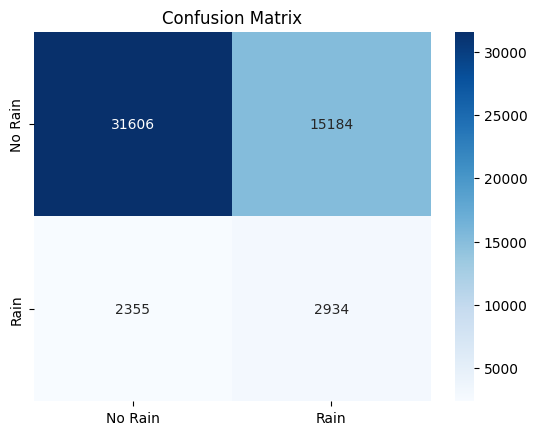

Tháng 10...
(405714, 17)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     57109
           1       0.38      0.82      0.52     13583

    accuracy                           0.71     70692
   macro avg       0.66      0.75      0.66     70692
weighted avg       0.83      0.71      0.74     70692

Confusion Matrix:
[[39094 18015]
 [ 2402 11181]]


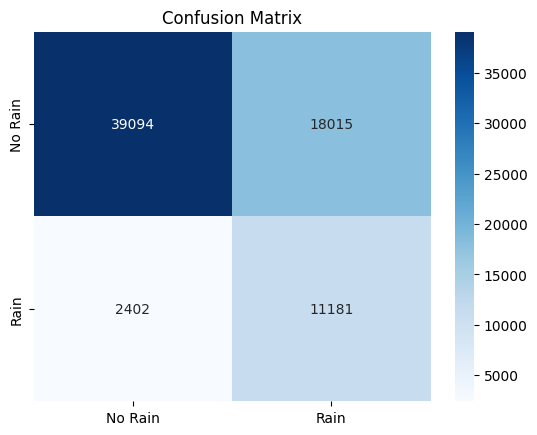

In [22]:
#Fine-tune + train
sigmas = np.logspace(-2, 1, 50)
param_grid = {'sigma': sigmas.tolist()}  # Grid search for sigma values

best_score = 0
best_sigma = 0

# Perform grid search over the values of sigma
print("Fine tuning...")
for name, train_X, train_Y, X_test, y_test in balanced_models_smoteenn:
    X_train, X_val, y_train, y_val = train_test_split(
        train_X, train_Y, test_size=0.2, random_state=42
    )
    print(f"{name}...")
    for sigma in param_grid['sigma']:
        pnn_batch = PNN(sigma=sigma, batch_size=2048)
        pnn_batch.fit(X_train, y_train)
        y_pred = pnn_batch.predict(X_val)
        score = classification_report(y_val, y_pred, zero_division=0, output_dict=True)['macro avg']['f1-score']
    
        if score > best_score:
            best_score = score
            best_sigma = sigma

    print(f"Best sigma: {best_sigma} with f1: {best_score}")

# Final evaluation with the best sigma
print("Train with best param...")
for name, X_train, y_train, X_test, y_test in balanced_models_smoteenn:
    print(f"{name}...")
    print(X_train.shape)
    pnn_batch = PNN(sigma=best_sigma, batch_size=1000)
    pnn_batch.fit(X_train, y_train)
    y_pred = pnn_batch.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Optionally, plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Rain", "Rain"], yticklabels=["No Rain", "Rain"])
    plt.title("Confusion Matrix")
    plt.show()